# 🏢 Swiggy – Company Overview
Swiggy is one of India’s largest online food ordering and delivery platforms, founded in 2014 and headquartered in Bengaluru. The company has revolutionized the food delivery landscape by connecting customers with a wide range of restaurants through a user-friendly mobile app and website.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv(r'C:\Users\Sweta Nishad\Downloads\Swiggy.csv', nrows= 5000000)
data.info()

C:\Users\Sweta Nishad\AppData\Local\Temp\ipykernel_35392\133671506.py:1: DtypeWarning: Columns (2,3,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\Sweta Nishad\Downloads\Swiggy.csv', nrows= 5000000)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 17 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   city             object
 1   city link        object
 2   subcity          object
 3   subcity link     object
 4   restaurant code  int64 
 5   restaurant       object
 6   rating           object
 7   rating count     object
 8   cost             object
 9   address          object
 10  cuisine          object
 11  licension no     object
 12  restaurant link  object
 13  menu             object
 14  item             object
 15  price            object
 16  veg_or_non_veg   object
dtypes: int64(1), object(16)
memory usage: 648.5+ MB


# Data cleaning

In [5]:
data.drop(['city link', 'subcity','subcity link', 'address','licension no', 'restaurant link'], inplace = True, axis = 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   city             object
 1   restaurant code  int64 
 2   restaurant       object
 3   rating           object
 4   rating count     object
 5   cost             object
 6   cuisine          object
 7   menu             object
 8   item             object
 9   price            object
 10  veg_or_non_veg   object
dtypes: int64(1), object(10)
memory usage: 419.6+ MB


In [7]:
data['cost'] = data['cost'].str[1:]
data.dropna(inplace = True)


In [8]:
data['rating'] = data['rating'].replace('--','0')

In [9]:
data['cost'] = data['cost'].astype(int)
data['rating'] = data['rating'].astype(float)
data['price'] = data['price'].astype(float)

# Descriptive Analysis

# City name based on veg and non  veg order

In [12]:
VEG_NON_VEG = data.groupby(['veg_or_non_veg' , 'city'])['restaurant'].count().reset_index().sort_values(by = 'restaurant' , ascending = False).head(10)
PIVOT = VEG_NON_VEG.pivot(index= 'city', columns = 'veg_or_non_veg' , values = 'restaurant').fillna(0).reset_index()
VEG_NON_VEG


,veg_or_non_veg,city,restaurant
195,Veg,Bangalore,785586
271,Veg,Chennai,586661
299,Veg,Delhi,569343
45,Non-veg,Bangalore,426234
121,Non-veg,Chennai,329260
156,Veg,Ahmedabad,278248
149,Non-veg,Delhi,233951
267,Veg,Chandigarh,221311
245,Veg,Bikaner,120982
117,Non-veg,Chandigarh,83897


# Veg vs Non-Veg Offerings – Summary
Cities like Ahmedabad and Bikaner are strongly vegetarian, with nearly no non-veg items listed, reflecting local food culture. In contrast, Bangalore, Chennai, and Delhi show a balanced demand for both veg and non-veg offerings. This highlights the need for city-specific menu strategies, where pure veg menus thrive in certain regions, while diverse cities benefit from mixed or segmented offerings.

#  which city order more cuisine

Text(0, 0.5, 'Total restaurent order per cuisine')

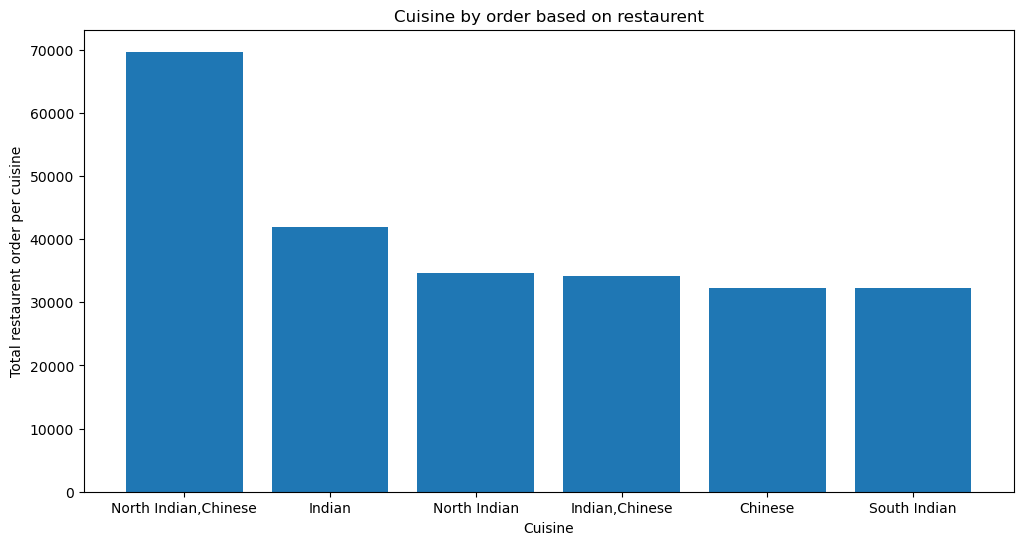

In [15]:
city = data.groupby(['cuisine', 'city' ])['restaurant'].count().reset_index().sort_values(by ='restaurant' , ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(city['cuisine'] , city['restaurant'])
plt.title('Cuisine by order based on restaurent')
plt.xlabel('Cuisine')
plt.ylabel('Total restaurent order per cuisine')

# Customer Insights

# What is the average rating by cuisine type across cities?

Text(0, 0.5, 'Rating')

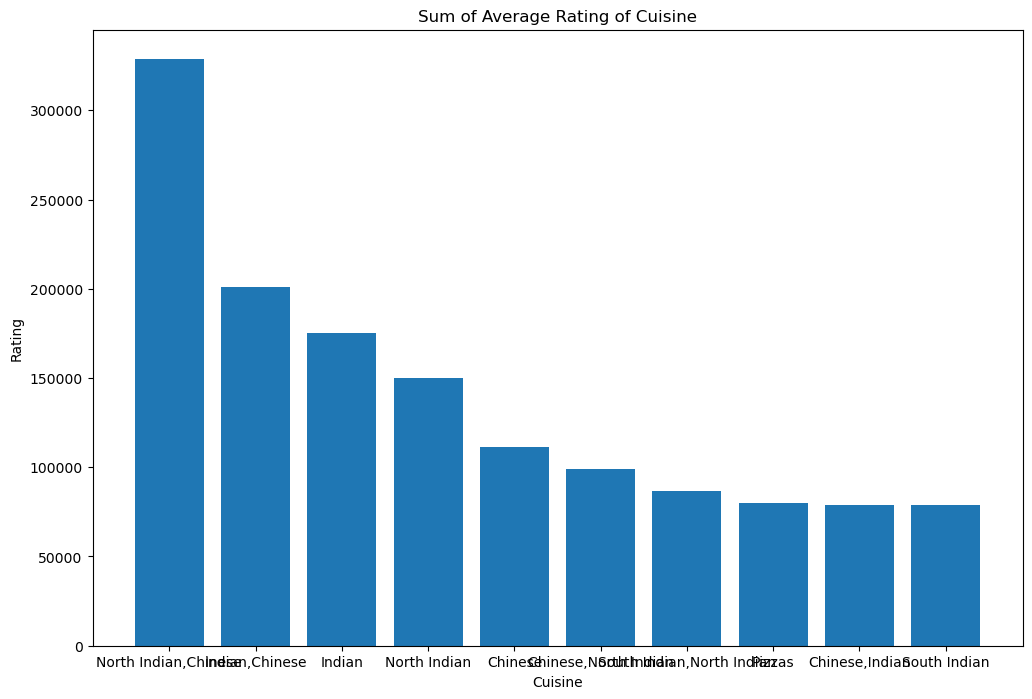

In [18]:
cuisine = data.groupby('cuisine')['rating'].count().reset_index().sort_values(by = 'rating', ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.bar(cuisine['cuisine'] , cuisine['rating'])
plt.title('Sum of Average Rating of Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Rating')

The most popular cuisines based on ratings are North Indian–Chinese and Indian–Chinese combinations, showing strong customer preference for fusion meals. Single cuisines like Indian, Chinese, and South Indian also receive high engagement.

# Are customers more likely to rate chain restaurants higher than local ones?

In [21]:
chain = data['restaurant'].value_counts().head(30).index.tolist()
chain_list = ['Subway',
 "Domino's Pizza",
 "McDonald's",
 'Pizza Hut',
 'KFC',
 'Oven Story Pizza',
 'Honest',
 'Cafe Coffee Day',
 'Burger King',
 'Faasos - Wraps & Rolls',
 'The Belgian Waffle Co.',
 "La Pino'z Pizza",
 'Behrouz Biryani',
 'The Chocolate Room',
 'LunchBox - Meals and Thalis',
 'Shree Marutinandan',
 'The Good Bowl',
 'Thalassery Restaurant',
 'The Biryani Life',
 "La Pino'Z Pizza",
 'Sweet Truth - Cake and Desserts',
 'Karnavati Snacks',
 'Baskin Robbins',
 'Tea Post',
 "Faasos' Signature Wraps & Rolls",
 'Firangi Bake',
 'Mirch Masala',
 'Vipul Dudhiya Sweets',
 'Sankalp',
 'The Shake Maker']
# Filter the DataFrame
filtered_data = data[data['restaurant'].isin(chain_list)]
unfilter_data = data[~data['restaurant'].isin(chain_list)]


Text(0.5, 1.0, 'chain restaurent rating')

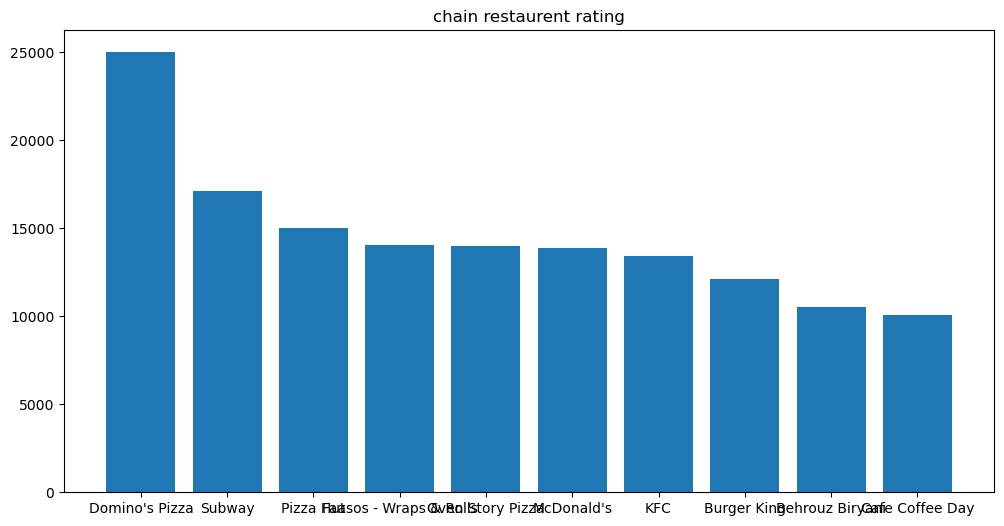

In [22]:
chain = filtered_data.groupby('restaurant')['rating'].count().reset_index().sort_values(by = 'rating', ascending = False).head(10)
chain
plt.figure(figsize= (12,6))
plt.bar(chain['restaurant'] , chain['rating'])
plt.title('chain restaurent rating')

Text(0.5, 1.0, 'chain restaurent rating')

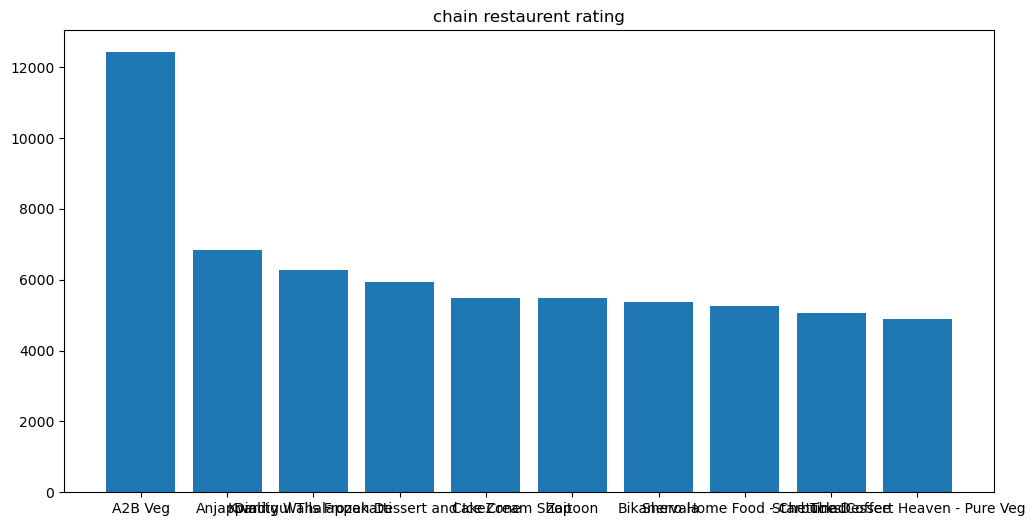

In [23]:
local= unfilter_data.groupby('restaurant')['rating'].count().reset_index().sort_values(by = 'rating',ascending = False).head(10)
plt.figure(figsize= (12,6))
plt.bar(local['restaurant'] , local['rating'])
plt.title('chain restaurent rating')

# yes customer give more rating to chain restaurent

# Which restaurants have low-cost items with high ratings — i.e., good value for money?

<Axes: xlabel='rating', ylabel='cost'>

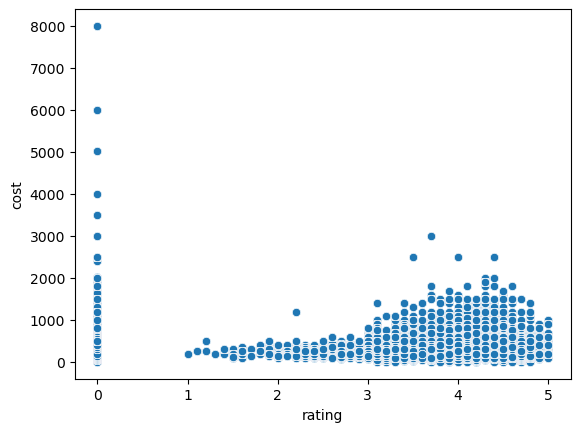

In [26]:
sns.scatterplot(x = data['rating'], y = data['cost'])

In this graph clearly show that between 250 - 500 order get more review

clearly show that this get rating between 4-5 rating
but some expensive and cheap order also get a 0 rating
most count of rating is between 3-5 ratingtingting

# Which menu items are most popular by veg/non-veg category?

In [30]:
data.groupby(['veg_or_non_veg'])['item'].count()

veg_or_non_veg
Non-veg    1521071
Veg        3470713
Name: item, dtype: int64

the veg menu more popular in compared to non-veg

# What items have high prices but low ratings — potential customer dissatisfaction?

In [33]:
# Step 2: Filter high-priced and low-rated items
high_price_low_rating = data[(data['price'] > 300) & (data['rating'] < 3.5)]

# Step 3: Select relevant columns to display
result = high_price_low_rating[['city', 'restaurant', 'item', 'price', 'rating', 'rating count']]

# Step 4: Sort for better readability (optional)
result = result.sort_values(by='rating')

# Show the output
print(result.head(10))
#high_price_low_rating

            city      restaurant                        item  price  rating  \
112       Abohar  AB FOODS POINT            Ab Special Pizza  350.0     0.0   
3742905  Chennai     Cakey Bakey   Eggless Double Choco Cake  675.0     0.0   
3742904  Chennai     Cakey Bakey  Eggless Black Current Cake  575.0     0.0   
3742903  Chennai     Cakey Bakey     Eggless Red Velvet Cake  525.0     0.0   
3742902  Chennai     Cakey Bakey    Eggless Butterscoth Cake  500.0     0.0   
3742901  Chennai     Cakey Bakey           Eggless Oreo Cake  500.0     0.0   
3742900  Chennai     Cakey Bakey         Eggless Orange Cake  500.0     0.0   
3742899  Chennai     Cakey Bakey          Eggless Mango Cake  500.0     0.0   
3742898  Chennai     Cakey Bakey    Egglessblack Forest Cake  475.0     0.0   
3742897  Chennai     Cakey Bakey   Eggless White Forest Cake  475.0     0.0   

            rating count  
112      Too Few Ratings  
3742905  Too Few Ratings  
3742904  Too Few Ratings  
3742903  Too Few Ratin

Several high-priced items, especially from Cakey Bakey in Chennai, have zero ratings and are marked as "Too Few Ratings", suggesting low visibility or customer engagement despite premium pricing. These items may need promotional support to improve traction.|

# Menu & Product Analysis

# Which menu items are most frequently offered across cities?

Text(0, 0.5, 'Menu')

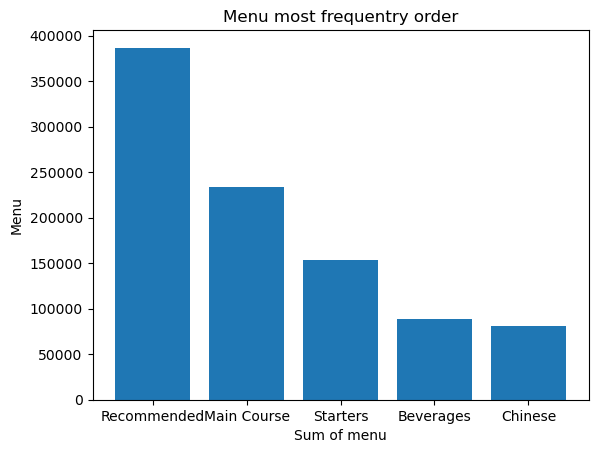

In [37]:
Menu = data.groupby(['menu'])['city'].count().reset_index().sort_values(by = 'city', ascending = False).head(5)
plt.bar(Menu['menu'] ,  Menu['city'])
plt.title('Menu most frequentry order')
plt.xlabel('Sum of menu')
plt.ylabel('Menu')

This table show that

. Customer mostly order recommended menu
. secande order is main course
. Last but not least that chinese

# What is the pricing distribution for key cuisines (e.g., North Indian, Chinese)?

Text(0, 0.5, 'Price Distribution')

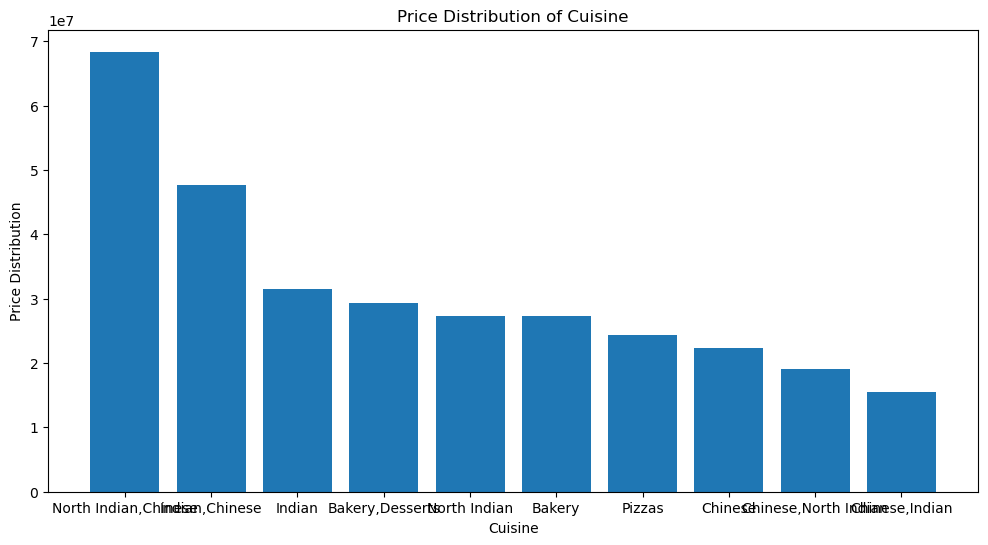

In [58]:
Cuisine = data.groupby('cuisine')['price'].sum().reset_index().sort_values(by = 'price' , ascending = False).head(10)
plt.figure(figsize=(12,6))
plt.bar(Cuisine['cuisine'] , Cuisine['price'])
plt.title('Price Distribution of Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Price Distribution')

Cuisines like North Indian–Chinese and Indian–Chinese generate the highest total menu prices, indicating strong revenue potential. Bakery, Desserts, and Pizzas also contribute significantly, showing high customer spending in both full meals and snack categories.

# Do combo meals or snacks result in higher average item pricing?

In [62]:
# Step 1: Create a new column to categorize items
def categorize_item(row):
    menu = str(row['menu']).lower()
    item = str(row['item']).lower()
    
    if 'combo' in menu or 'combo' in item or 'meal' in item:
        return 'Combo'
    elif 'snack' in menu or any(word in item for word in ['fries', 'samosa', 'cutlet', 'nugget', 'snack']):
        return 'Snack'
    else:
        return 'Other'

# Apply the function to create a new column
data['item_type'] = data.apply(categorize_item, axis=1)

# Step 2: Filter only Combo and Snack items
filtered = data[data['item_type'].isin(['Combo', 'Snack'])]

# Step 3: Group by item_type and calculate average price
avg_prices = filtered.groupby('item_type')['price'].mean().reset_index()

# Step 4: Display results
print(avg_prices)

  item_type       price
0     Combo  330.812165
1     Snack  151.762954


# Which restaurants have low-cost items with high ratings — i.e., good value for money?

In [44]:
low_cost_item = data[(data['cost'] <300) & (data['rating'] > 4.0 )]
low_cost_item['restaurant'].value_counts().reset_index().head(10)


,restaurant,count
0,Faasos - Wraps & Rolls,9532
1,The Belgian Waffle Co.,7417
2,LunchBox - Meals and Thalis,4773
3,Chaayos Chai+Snacks=Relax,4449
4,NIC Natural Ice Creams,4279
5,CakeZone,4166
6,Chai Point,3999
7,Baskin Robbins,3900
8,Kanti Sweets,3177
9,Sri Krishna Sweets,3109


Top restaurants like Faasos - Wraps & Rolls and The Belgian Waffle Co. 
have the highest number of menu items, indicating a wide variety of offerings that likely attract diverse customer preferences. 
Popular brands in snacks, sweets, and beverages dominate the list.

# What items have high prices but low ratings — potential customer dissatisfaction?

In [47]:
low_cost_item = data[(data['cost'] > 300) & (data['rating'] > 3.0 )]
low_cost_item['item'].value_counts().reset_index().head(10)

,item,count
0,Paneer Butter Masala,2004
1,Veg Fried Rice,1958
2,Chicken Fried Rice,1865
3,Butter Naan,1858
4,Jeera Rice,1740
5,Egg Fried Rice,1477
6,Garlic Naan,1444
7,Paneer Tikka,1307
8,Dal Makhani,1187
9,Butter Roti,1182


Popular menu items like Paneer Butter Masala, Veg Fried Rice, and Chicken Fried Rice lead in orders, highlighting customer preference for classic Indian dishes with a mix of vegetarian and non-vegetarian options.|

# Operational & Market Expansion Insights

# Which cities or locations show opportunity for new restaurant expansion?

<BarContainer object of 5 artists>

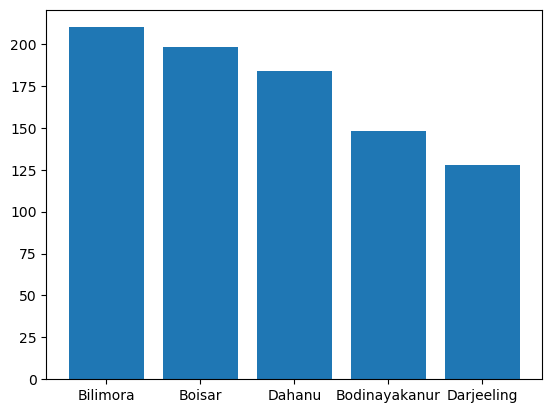

In [69]:
city = data['city'].value_counts().tail(5).reset_index()
#plt.bar()
plt.bar(city['city'] , city['count'])

# Are there cuisines underserved in certain cities

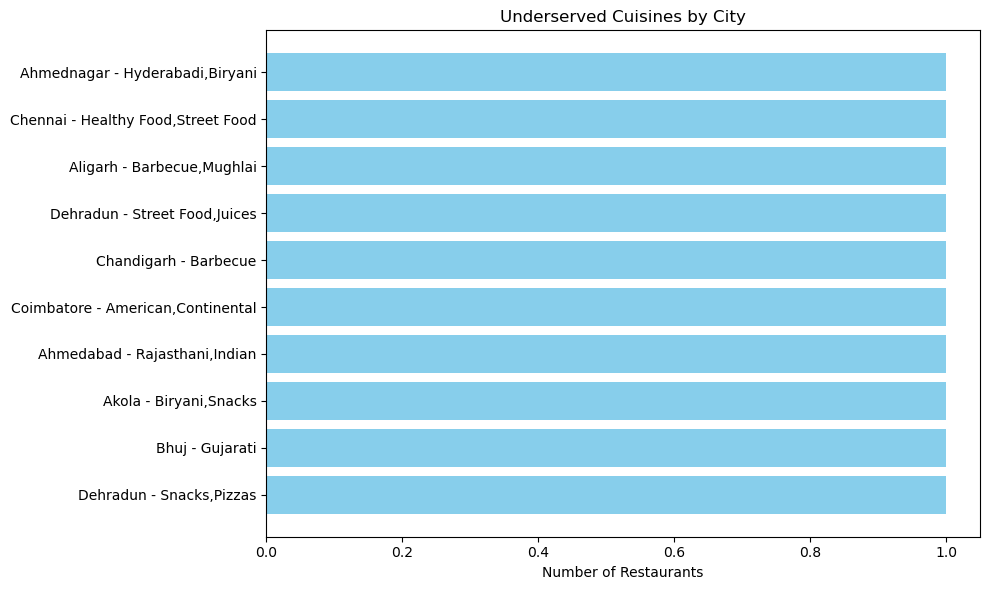

In [71]:
Underserved = data.groupby([ 'cuisine', 'city'])['restaurant'].count().reset_index().sort_values(by = 'restaurant', ascending = False).tail(10)
plt.figure(figsize=(10, 6))
plt.barh(Underserved['city'] + " - " + Underserved['cuisine'], Underserved['restaurant'], color='skyblue')
plt.xlabel('Number of Restaurants')
plt.title('Underserved Cuisines by City')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()

Some cities have very limited representation of specific cuisines, with only one restaurant offering certain food types like Hyderabadi Biryani in Ahmednagar or Barbecue in Chandigarh. 
This indicates potential opportunities for new restaurants to introduce these underserved cuisines in these markets.

#  Do veg or non-veg offerings dominate in each city?

In [85]:
veg_vs_nonveg = data.groupby(['city', 'veg_or_non_veg'])['item'].count().reset_index()

# Optional: Pivot for better visual comparison
pivot = veg_vs_nonveg.pivot(index='city', columns='veg_or_non_veg', values='item').fillna(0)

# Add a dominance column (which has more: Veg or Non-veg?)
pivot['dominant'] = pivot.apply(lambda row: 'Veg' if row['Veg'] >= row['Non-veg'] else 'Non-veg', axis=1)

pivot.head(10)  # Show first 10 cities



veg_or_non_veg,Non-veg,Veg,dominant
city,,,
Abohar,440,3254,Veg
Adilabad,725,1286,Veg
Adityapur,12426,25339,Veg
Adoni,1535,2082,Veg
Agartala,7790,7595,Non-veg
Agra,6359,30949,Veg
Ahmedabad,35718,278248,Veg
Ahmednagar,1636,6026,Veg
Aizawl,1305,770,Non-veg


Most cities have a higher number of vegetarian offerings, making Veg the dominant category in places like Ahmedabad, Agra, and Ajmer. However, some cities such as Agartala and Aizawl show a dominance of Non-veg options, reflecting regional dietary preferences.

# How many restaurants are active in each city — is the market saturated or open?

Text(0, 0.5, 'Restaurent Count')

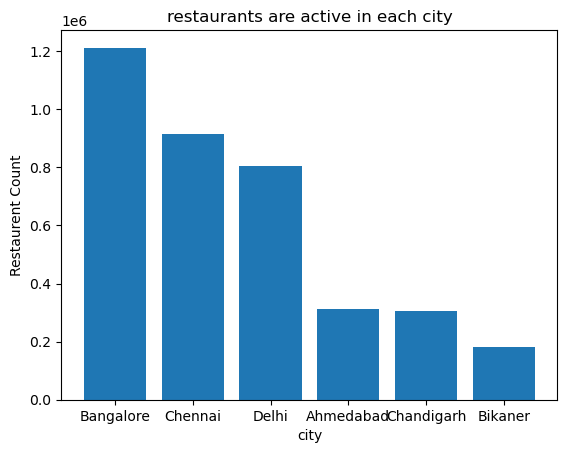

In [91]:
Active_restaurent = data.groupby('city')['restaurant'].count().reset_index().sort_values(by='restaurant', ascending = False).head(6)
plt.bar(Active_restaurent['city'], Active_restaurent['restaurant'])
plt.title('restaurants are active in each city')
plt.xlabel('city')
plt.ylabel('Restaurent Count')

#  What is the distribution of restaurants with “Too Few Ratings”? Are there marketing gaps?

Text(0, 0.5, 'rating')

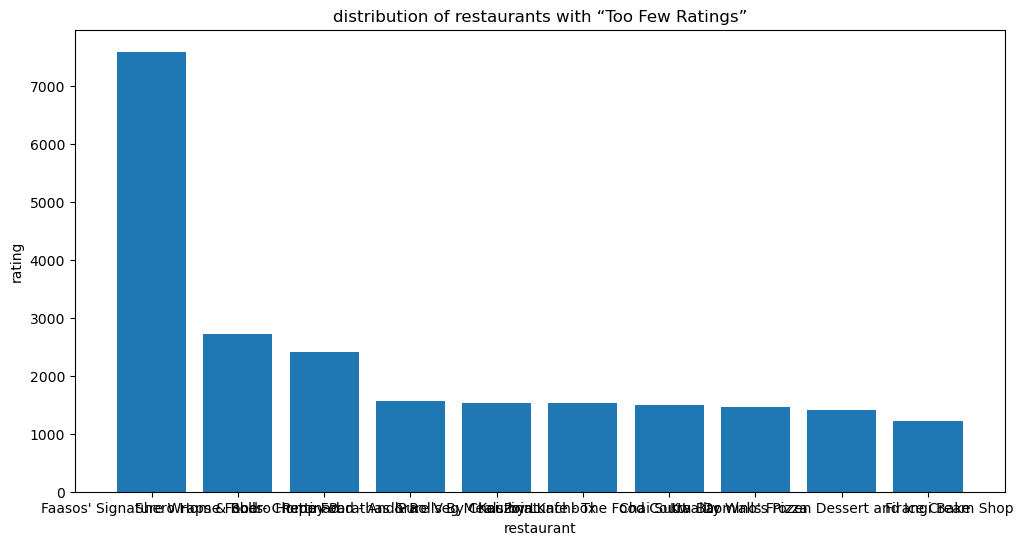

In [95]:
few_rating = data[data['rating']== 0 ]
df = pd.DataFrame(few_rating)
gh = df.groupby('restaurant')['rating'].count().reset_index().sort_values(by = 'rating' , ascending = False).head(10)
plt.figure(figsize=(12,6))
plt.bar(gh['restaurant'], gh['rating'])
plt.title('distribution of restaurants with “Too Few Ratings”')
plt.xlabel('restaurant')
plt.ylabel('rating')

The data highlights top-rated restaurants based on the number of ratings received. Faasos' Signature Wraps & Rolls leads with 7,586 ratings, followed by Shero Home Food branches specializing in Chettinad and Andhra cuisines. Popular fast-food and dessert outlets like Domino's Pizza and Kwality Walls also feature prominently, showing strong customer engagement.

# How do chain restaurants (e.g., KFC) perform vs. local ones in terms of rating and pricing?

In [64]:
# Rating of the chain restaurents
filtered_data.groupby(['rating','restaurant'])['menu'].count().reset_index().sort_values(by = 'rating' , ascending = False).head(10)

,rating,restaurant,menu
274,4.9,Baskin Robbins,61
273,4.8,The Belgian Waffle Co.,287
272,4.8,Domino's Pizza,214
271,4.7,Vipul Dudhiya Sweets,237
270,4.7,Sankalp,175
269,4.7,Domino's Pizza,150
268,4.7,Cafe Coffee Day,139
267,4.7,Baskin Robbins,223
262,4.6,Domino's Pizza,1333
259,4.6,Baskin Robbins,932


This data shows some of the highest-rated restaurants, with ratings ranging from 4.6 to 4.9. Baskin Robbins, Domino’s Pizza, and The Belgian Waffle Co. stand out for both high ratings and a wide variety of menu items. These popular brands maintain strong customer satisfaction while offering extensive menu options.

In [66]:
# Rating of the local restaurents
unfilter_data.groupby(['rating','restaurant'])['menu'].count().reset_index().sort_values(by = 'rating' , ascending = False).head(10)

,rating,restaurant,menu
48517,5.0,Vaishno Dhaba,48
48481,5.0,Just Dig In,12
48464,5.0,ESCOBAR PANINI s,25
48465,5.0,Emoi Artisanal Ice Creams & Gelato,55
48466,5.0,Fabelle Chocolates - ITC Gardenia,66
48468,5.0,Fittin,16
48469,5.0,Flavours of Champaran,97
48470,5.0,Fresh crunch pizza,31
48471,5.0,Frooze,10
48472,5.0,"Frozen Bottle - Milkshakes, Desserts And Ice C...",114


# Are branded chains charging a premium compared to local vendors?

In [68]:
filtered_data.groupby('restaurant')['cost'].sum().reset_index().head(5)

,restaurant,cost
0,Baskin Robbins,2092050
1,Behrouz Biryani,5257000
2,Burger King,4240150
3,Cafe Coffee Day,3014700
4,Domino's Pizza,10097700


In [69]:
unfilter_data.groupby('restaurant')['cost'].sum().reset_index().head(5)

,restaurant,cost
0,!PUNJ,920
1,# shawarma & grill,23500
2,#MOMO,8000
3,#Miri,271800
4,#PizzaLove,40800


yes chain business charge more compare to local business

#  📊 Data-Driven Recommendations for Swiggy Based on Analysis
# 1. Promote High-Rated, Low-Cost Items
Insight: Some restaurants offer items with low prices and high ratings, indicating great value for money.

Recommendation: Highlight these dishes in app banners or curated lists like “Budget-Friendly Bestsellers” to boost customer satisfaction and retention.

# 2. City-Specific Cuisine Expansion
Insight: Certain cuisines (e.g., Hyderabadi, Rajasthani) are underrepresented in specific cities.

Recommendation: Encourage onboarding of restaurants offering diverse cuisines in underserved cities (e.g., Barbecue in Chandigarh, Gujarati in Bhuj) to fill the demand gap.

# 3. Optimize Veg/Non-Veg Supply Mix
Insight: Some cities (like Ahmedabad and Bikaner) are heavily veg-dominant, while others (like Agartala and Aizawl) prefer non-veg.

Recommendation: Tailor local campaigns and new restaurant partnerships to align with city-level dietary preferences.

# 4. Partner with Local High-Rating Restaurants
Insight: Many local eateries (e.g., Shero Home Food) have strong ratings without being branded chains.

Recommendation: Partner with these restaurants for exclusive deals, loyalty programs, or Swiggy-exclusive items to drive brand affinity.

# 5. Boost Visibility of Quality Restaurants with Few Ratings
Insight: Several restaurants with good quality menus have “Too Few Ratings”.

Recommendation: Run visibility boosts or prompt early feedback campaigns (e.g., “Rate your meal & get ₹20 off”) to encourage initial engagement.

# 6. Refine Combo & Snack Pricing Strategy
Insight: Combos and snacks often show higher average pricing compared to standalone items.

Recommendation: Reassess combo pricing and offer combo customization to increase uptake, especially during lunch hours.

# 7. Target Top-Selling Dishes for Promotions
Insight: Items like Paneer Butter Masala, Fried Rice, and Butter Naan are highly ordered.

Recommendation: Create bundles or discount offers on these bestsellers during peak times to increase average order value.

# 8. City-Based Expansion Strategy
Insight: Some smaller cities show promising order volumes but limited restaurant diversity.

Recommendation: Use this data to prioritize onboarding more restaurants and partners in these emerging markets (e.g., Adityapur, Agartala).